# Getting Data from WITS

In [1]:
import pandas as pd

### Reading in Data

In [2]:
# The two files were downloaded from the WITS (World Integrated Trade Solution) website
# https://wits.worldbank.org/CountryProfile/en/Country/BY-COUNTRY/StartYear/1988/EndYear/2017/Indicator/NMBR-MPRT-PRTNR#
# https://wits.worldbank.org/CountryProfile/en/Country/BY-COUNTRY/StartYear/1988/EndYear/2017/Indicator/NMBR-XPRT-PRTNR#

imp = pd.read_csv('WITS_Import.csv')
exp = pd.read_csv('WITS_Export.csv')

In [3]:
imp.head()

,Country Name,Indicator Name,1988,1989,1990,1991,1992,1993,1994,1995,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,Number of import partners,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,56.0,58.0,61.0,72.0,8.0,8.0,8.0,85.0,77.0,NaN
1,Albania,Number of import partners,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,151.0,156.0,149.0,154.0,147.0,152.0,161.0,160.0,177.0,177.0
2,Algeria,Number of import partners,NaN,NaN,NaN,NaN,121.0,105.0,112.0,127.0,...,165.0,164.0,170.0,166.0,167.0,172.0,174.0,178.0,175.0,170.0
3,Andorra,Number of import partners,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.0,...,129.0,127.0,118.0,125.0,122.0,130.0,123.0,121.0,126.0,137.0
4,Angola,Number of import partners,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,191.0,183.0,192.0,198.0,192.0,183.0,177.0,170.0,168.0


In [4]:
exp.head()

,Country Name,Indicator Name,1988,1989,1990,1991,1992,1993,1994,1995,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,Number of export partners,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34.0,36.0,40.0,37.0,7.0,7.0,7.0,53.0,48.0,NaN
1,Albania,Number of export partners,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,79.0,81.0,97.0,98.0,96.0,103.0,106.0,105.0,116.0,116.0
2,Algeria,Number of export partners,NaN,NaN,NaN,NaN,73.0,73.0,60.0,69.0,...,102.0,117.0,117.0,110.0,113.0,118.0,126.0,139.0,125.0,127.0
3,Andorra,Number of export partners,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,...,75.0,76.0,98.0,98.0,107.0,112.0,117.0,109.0,117.0,117.0
4,Angola,Number of export partners,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,33.0,31.0,33.0,30.0,35.0,38.0,134.0,135.0,137.0


### Pivoting the Data

In [5]:
# Need to change from separate columns for each country to repeated rows
# and a column for the percent value

# First, I will drop the Indicator Name column and change Country Name to the index
imp2 = imp.drop('Indicator Name', axis=1)
imp2 = imp2.set_index('Country Name')

# Now, I'll use stack to pivot the data
imp2 = imp2.stack().to_frame()
imp2.reset_index(inplace=True)

# Finally, rename columns and sort
imp2.rename({'Country Name':'Country', 'level_1':'Year', 0:'Imp_Partners'}, axis=1, inplace=True)
imp2.sort_values(['Country', 'Year'], inplace=True)

imp2.head()

,Country,Year,Imp_Partners
0,Afghanistan,2008,56.0
1,Afghanistan,2009,58.0
2,Afghanistan,2010,61.0
3,Afghanistan,2011,72.0
4,Afghanistan,2012,8.0


In [6]:
# Same steps for export partners

# First, I will drop the Indicator Name column and change Country Name to the index
exp2 = exp.drop('Indicator Name', axis=1)
exp2 = exp2.set_index('Country Name')

# Now, I'll use stack to pivot the data
exp2 = exp2.stack().to_frame()
exp2.reset_index(inplace=True)

# Finally, rename columns and sort
exp2.rename({'Country Name':'Country', 'level_1':'Year', 0:'Exp_Partners'}, axis=1, inplace=True)
exp2.sort_values(['Country', 'Year'], inplace=True)

exp2.head()

,Country,Year,Exp_Partners
0,Afghanistan,2008,34.0
1,Afghanistan,2009,36.0
2,Afghanistan,2010,40.0
3,Afghanistan,2011,37.0
4,Afghanistan,2012,7.0


### Merging Datasets

In [7]:
partners = pd.merge(left=imp2, right=exp2, how='outer',
                       left_on=['Country', 'Year'], right_on=['Country', 'Year'])

partners.sort_values(['Country', 'Year'], inplace=True)
partners.reset_index(drop=True, inplace=True)

partners.head()

,Country,Year,Imp_Partners,Exp_Partners
0,Afghanistan,2008,56.0,34.0
1,Afghanistan,2009,58.0,36.0
2,Afghanistan,2010,61.0,40.0
3,Afghanistan,2011,72.0,37.0
4,Afghanistan,2012,8.0,7.0


### Fixing Country Names

In [8]:
import pycountry
# Official/Up-to-date Country Names
pycountries = [country.name for country in pycountry.countries]

# Country names that appear in WITS data
countries = sorted(list(set(partners.iloc[:,0])))

# Making csv for me to see what needs to be changed
Same = sorted(list(set(countries).intersection(set(pycountries))))
WITS_Only = sorted(list(set(countries) - set(pycountries)))
Py_Only = sorted(list(set(pycountries) - set(countries)))
comparisondf = pd.DataFrame({'Same': pd.Series(Same),
                             'WITS_Only': pd.Series(WITS_Only),
                             'Py_Only': pd.Series(Py_Only)})
#comparisondf.to_csv('comp.csv')

In [9]:
# Other country names need to be updated to match current official names
update_dic = {'Anguila':'Anguilla',
              'Bahamas, The':'Bahamas',
              'Bolivia':'Bolivia, Plurinational State of',
              'Brunei':'Brunei Darussalam',
              'Cape Verde':'Cabo Verde',
              'Congo, Rep.':'Congo',
              "Cote d'Ivoire":"Côte d'Ivoire",
              'Czech Republic':'Czechia',
              'East Timor':'Timor-Leste',
              'Egypt, Arab Rep.':'Egypt',
              'Ethiopia(excludes Eritrea)':'Ethiopia',
              'Faeroe Islands':'Faroe Islands',
              'Fm Sudan':'South Sudan',
              'Gambia, The':'Gambia',
              'Hong Kong, China':'Hong Kong',
              'Iran, Islamic Rep.':'Iran, Islamic Republic of',
              'Korea, Rep.':'Korea, Republic of',
              'Kyrgyz Republic':'Kyrgyzstan',
              'Lao PDR':"Lao People's Democratic Republic",
              'Macedonia, FYR':'North Macedonia',
              'Micronesia, Fed. Sts.':'Micronesia, Federated States of',
              'Moldova':'Moldova, Republic of',
              'Occ.Pal.Terr':'Palestine, State of',
              'Other Asia, nes':'Taiwan, Province of China',
              'Reunion':'Réunion',
              'Serbia, FR(Serbia/Montenegro)':'Serbia',
              'Slovak Republic':'Slovakia',
              'St. Kitts and Nevis':'Saint Kitts and Nevis',
              'St. Lucia':'Saint Lucia',
              'St. Vincent and the Grenadines':'Saint Vincent and the Grenadines',
              'Swaziland':'Eswatini',
              'Tanzania':'Tanzania, United Republic of',
              'Turks and Caicos Isl.':'Turks and Caicos Islands',
              'Venezuela':'Venezuela, Bolivarian Republic of',
              'Vietnam':'Viet Nam',
              'Wallis and Futura Isl.':'Wallis and Futuna'}
partners = partners.replace({"Country": update_dic})
partners.sort_values(['Country', 'Year'], inplace=True)
partners.reset_index(drop=True, inplace=True)

In [10]:
# WITS has a few groups/outdated countries that need to be removed
remove = ['Belgium-Luxembourg', 'European Union', 'Netherlands Antilles']
partners = partners[~partners.Country.isin(remove)]

partners.sort_values(['Country', 'Year'], inplace=True)
partners.reset_index(drop=True, inplace=True)

In [11]:
# Checking that it worked
countries = sorted(list(set(partners.iloc[:,0])))
Same = sorted(list(set(countries).intersection(set(pycountries))))
WITS_Only = sorted(list(set(countries) - set(pycountries)))
Py_Only = sorted(list(set(pycountries) - set(countries)))
comparisondf2 = pd.DataFrame({'Same': pd.Series(Same),
                             'WITS_Only': pd.Series(WITS_Only),
                             'Py_Only': pd.Series(Py_Only)})
#comparisondf2.to_csv('comp2.csv')
# All good

C:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  import sys


### Cleaning

In [12]:
# We are missing some of the export partners data,
# and the Year column needs to be converted to int
partners.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       4000 non-null   object 
 1   Year          4000 non-null   object 
 2   Imp_Partners  4000 non-null   float64
 3   Exp_Partners  3949 non-null   float64
dtypes: float64(2), object(2)
memory usage: 125.1+ KB


In [13]:
partners['Year'] = partners['Year'].astype(str).astype(int)
partners.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       4000 non-null   object 
 1   Year          4000 non-null   int32  
 2   Imp_Partners  4000 non-null   float64
 3   Exp_Partners  3949 non-null   float64
dtypes: float64(2), int32(1), object(1)
memory usage: 109.5+ KB


In [ ]:
# Closer look at those rows
# partners[partners.isna().any(axis=1)]

In [14]:
# Adding a new column that is the max value of the import/export columns
# and then getting rid of the old ones
partners['Max_Partners'] = partners[['Imp_Partners', 'Exp_Partners']].max(axis=1)
partners.drop(columns=['Imp_Partners', 'Exp_Partners'], inplace=True)

In [15]:
# I'm going to limit the years to 1990-2016, so that they
# match what we have in the three datasets.

# Get rid of years > 2016
indexNames = partners[partners['Year']>2016].index
partners2 = partners.drop(indexNames)

# Get rid of years < 1990
indexNames = partners[partners['Year']<1990].index
partners2.drop(indexNames, inplace=True)

partners2.sort_values(['Country', 'Year'], inplace=True)
partners2.reset_index(drop=True, inplace=True)
partners2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3811 entries, 0 to 3810
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       3811 non-null   object 
 1   Year          3811 non-null   int32  
 2   Max_Partners  3811 non-null   float64
dtypes: float64(1), int32(1), object(1)
memory usage: 74.6+ KB


In [16]:
# Now I'll make a dataframe of all the countries repeated 
# for each year from 1990-2016 that can then be joined with partners2,
# so that we can see missing years for each country

# Makes a dataframe with each year repeated as many
# times as there are countries (249 times)
countries = sorted(list(set(partners2.Country)))
years = pd.Series(range(1990,2017), name='Year')
years2 = years.repeat(len(countries))
years_countries_df = years2.to_frame()

# Cycles through country names to add one for each year
from itertools import cycle
seq = cycle(countries)
years_countries_df['Country'] = [next(seq) for count in range(years_countries_df.shape[0])]

years_countries_df.reset_index(drop=True, inplace=True)

In [17]:
# Merging with partners2 data so that all countries and years appear,
# even if the variables are missing
partners3 = pd.merge(left=partners2, right=years_countries_df, how='outer',
                       left_on=['Country', 'Year'], right_on=['Country', 'Year'])
partners3.sort_values(['Country', 'Year'], inplace=True)
partners3.reset_index(drop=True, inplace=True)
partners3.head()

,Country,Year,Max_Partners
0,Afghanistan,1990,NaN
1,Afghanistan,1991,NaN
2,Afghanistan,1992,NaN
3,Afghanistan,1993,NaN
4,Afghanistan,1994,NaN


In [18]:
# Creating dataframe that counts missing years for each country 
myc = partners3[partners3.isna().Max_Partners].groupby('Country').count()
myc.reset_index(inplace=True)
myc.drop('Max_Partners', axis=1, inplace=True)
myc.rename({'Year':'Missing_Years_Count'}, axis=1, inplace=True)
myc.head()

,Country,Missing_Years_Count
0,Afghanistan,18
1,Albania,6
2,Algeria,2
3,Andorra,6
4,Angola,18


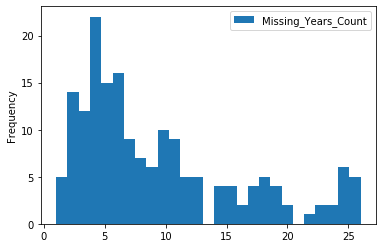

In [19]:
# 1990-2016 is 27 years. I don't think we should impute Max_Partners
# for more than 9 missing years for each country. Those with 10+
# missing will be removed.
myc.plot.hist(bins=27)

In [20]:
# Removing countries missing more than 9 years of data

drop_countries = myc.loc[myc['Missing_Years_Count'] > 9, 'Country'].tolist()
partners4 = partners3.copy()

for country in drop_countries:
    indexNames = partners4[partners4['Country'] == country].index
    partners4.drop(indexNames, inplace=True)

partners4.reset_index(drop=True, inplace=True)
partners4.head()

,Country,Year,Max_Partners
0,Albania,1990,NaN
1,Albania,1991,NaN
2,Albania,1992,NaN
3,Albania,1993,NaN
4,Albania,1994,NaN


In [21]:
# Now after removing the countries that were missing > 9 years, I'm going
# to see how many countries are missing from each year

# Creating dataframe that counts number of missing countries for each year
mcc = partners4[partners4.isna().Max_Partners].groupby('Year').count()
mcc.reset_index(inplace=True)
mcc.drop('Max_Partners', axis=1, inplace=True)
mcc.rename({'Country':'Missing_Countries_Count'}, axis=1, inplace=True)
mcc

# I'm going to leave all the years for now, but we may want to remove
# some of the early ones later if they are also missing a lot of 
# values in the other datasets.

,Year,Missing_Countries_Count
0,1990,102
1,1991,93
2,1992,79
3,1993,68
4,1994,45
5,1995,29
6,1996,19
7,1997,11
8,1998,12
9,1999,4


### Imputing Data

In [22]:
# I'm going to fill in the missing data (grouped by country) by
# using the interpolate function

# List of countries to loop through
countries = sorted(list(set(partners4['Country'])))

# Initializing master df to add results to
imputed_df = pd.DataFrame(columns=['Year', 'Country', 'Max_Partners'])

for country in countries:
    # Set up dataframe for the one country
    country_df = partners4.loc[partners4['Country']==country, :].copy()
    
    # Convert the Year column to DateTime format and set it as index
    # (requirement for interpolate)
    country_df['Year'] = pd.to_datetime(country_df['Year'], format='%Y')
    country_df = country_df.set_index('Year')
    
    # Use interpolate on the Max_Partners column with the time method
    # to fill in missing values.
    country_df['Max_Partners'] = country_df['Max_Partners'].interpolate(method='time', limit_direction='both')
    
    # Change Year back to an int column
    country_df.reset_index(inplace=True)
    country_df['Year'] = country_df['Year'].dt.year
    
    # Add specific country df to the master df
    imputed_df = pd.concat([imputed_df, country_df], axis=0)

In [23]:
# No missing values, but the Max_Partners is a float instead of int
# due to some of the imputed values
imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3564 entries, 0 to 26
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          3564 non-null   object 
 1   Country       3564 non-null   object 
 2   Max_Partners  3564 non-null   float64
dtypes: float64(1), object(2)
memory usage: 111.4+ KB


In [24]:
# The number of trade partners should be an integer,
# so I'm going to round and convert the Max_Partners column
imputed_df.loc[:,'Max_Partners'] = imputed_df.Max_Partners.round(0).astype(int)
imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3564 entries, 0 to 26
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          3564 non-null   object
 1   Country       3564 non-null   object
 2   Max_Partners  3564 non-null   int32 
dtypes: int32(1), object(2)
memory usage: 97.5+ KB


### Writing to CSV

In [25]:
imputed_df.to_csv('WITS_Clean.csv', index=False)